In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Data preprocessing
**Steps:**
- **Import the dataset.**
- **Handle missing data.**
- **Encode categorical data into numerical data.**
- **Split dataset into training set & test set.**
- **Apply feature scaling.**


In [2]:
# importing the dataset
dataset = pd.read_csv('Datasets/50_Startups.csv')
dataset.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
31,61136.38,152701.92,88218.23,New York,97483.56
48,542.05,51743.15,0.00,New York,35673.41
47,0.00,135426.92,0.00,California,42559.73
46,1315.46,115816.21,297114.46,Florida,49490.75
8,120542.52,148718.95,311613.29,New York,152211.77


In [3]:
# converting categorical data into numerical data
state_dummies = pd.get_dummies(dataset['State'], drop_first = True)

# drop the column with categorical data
dataset.drop(labels = ['State'], axis = 1, inplace = True)

# add newly generated numerical data (dummy variables) to the dataset
dataset = pd.concat([state_dummies, dataset], axis = 1)
dataset.sample(5)

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
5,0,1,131876.90,99814.71,362861.36,156991.12
27,0,1,72107.60,127864.55,353183.81,105008.31
26,1,0,75328.87,144135.98,134050.07,105733.54
40,0,0,28754.33,118546.05,172795.67,78239.91
24,0,1,77044.01,99281.34,140574.81,108552.04


In [4]:
dataset.insert(0, 'X_0', np.ones((len(dataset), 1)))

In [5]:
dataset.sample(5)

,X_0,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
27,1.0,0,1,72107.60,127864.55,353183.81,105008.31
18,1.0,1,0,91749.16,114175.79,294919.57,124266.90
43,1.0,0,1,15505.73,127382.30,35534.17,69758.98
31,1.0,0,1,61136.38,152701.92,88218.23,97483.56
25,1.0,0,0,64664.71,139553.16,137962.62,107404.34


In [6]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Check MultiCollinearity

In [20]:
# Observe the results of colinearity among independent variables
X.corr()

,X_0,Florida,New York,R&D Spend,Administration,Marketing Spend
X_0,NaN,NaN,NaN,NaN,NaN,NaN
Florida,NaN,1.000000,-0.492366,0.105711,0.010493,0.205685
New York,NaN,-0.492366,1.000000,0.039068,0.005145,-0.033670
R&D Spend,NaN,0.105711,0.039068,1.000000,0.241955,0.724248
Administration,NaN,0.010493,0.005145,0.241955,1.000000,-0.032154
Marketing Spend,NaN,0.205685,-0.033670,0.724248,-0.032154,1.000000


## Multiple Linear Regression

$$ y = b_{0}X_{0} + b_{1}X_{1} + ... + b_{n}X_{n} $$ where, <br>$ X_{0} = 1 $ <br>$X_{1}, X_{2}, .... , X_{n}$ are Features


## Backward Elimination
**steps:**

- **Select a significance level to stay in the model. (ex. SL = .05)**
- **Fit the full model with all possible predictors**
- **Consider the predcitor with highest P-value. If P>SL, go to the next step, otherwise go to finish because model is ready**
- **Remove the predictor**
- **Fit the model without the removed variable**

In [7]:
import statsmodels.regression.linear_model as sm

X_opt = X.iloc[:, [0, 1, 2, 3, 4, 5]]
# OLS - Ordinary Least Square
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.34e-27
Time:                        14:11:43   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
X_0              5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
Florida           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
New York          -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X_opt = X.iloc[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           8.49e-29
Time:                        14:11:43   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
X_0              5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
Florida           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X_opt = X.iloc[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           4.53e-30
Time:                        14:11:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
X_0              5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
X_opt = X.iloc[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.16e-31
Time:                        14:11:44   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
X_0              4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X_opt = X.iloc[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           3.50e-32
Time:                        14:11:44   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X_0         4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
final_X = X.iloc[:, 3:4].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size = .2, random_state = 1024)

In [14]:
from sklearn.linear_model import LinearRegression

# creating an instance of linear regression
regressor = LinearRegression()
# fitting our training data to regressor
regressor.fit(X_train, y_train)

# prediction on test data
y_pred = regressor.predict(X_test)

In [15]:
# showing y_true and y_predicted value side by side
pd.DataFrame(list(zip(y_test, y_pred)), columns = ['y_true', 'y_pred'])

,y_true,y_pred
0,118474.03,114880.866384
1,96479.51,89824.329521
2,166187.94,169446.636217
3,111313.02,116650.419090
4,103282.38,106427.273101
5,191050.39,178838.056556
6,78239.91,75523.061434
7,132602.65,151081.605559
8,14681.40,51697.408599
9,192261.83,188704.691877


In [16]:
from sklearn.metrics import r2_score

# calculating R-squared value to evaluate our model
r2_score(y_test, y_pred)

0.9244658072363383

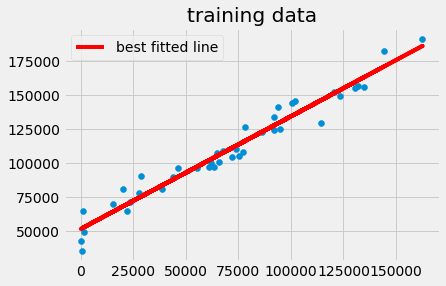

In [17]:
# showing best fitted line on training data
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red', label = 'best fitted line')
plt.title('training data')
plt.legend()
plt.show()

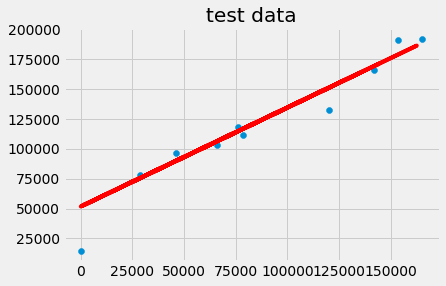

In [18]:
# showing best fitted line on test data
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color = 'red', label = 'best fitted line')
plt.title('test data')
plt.show()